# Capstone Project: HealthCare Billing Amount Prediction Final Report

This project will predict the hospital billing using patient and admission data from the  ["HealthCare_Dataset.csv"](https://https://www.kaggle.com/datasets/prasad22/healthcare-dataset) found on Kaggle.com. The output will achieve accurate cost forecasts to in an effort to optimze hospital resource planning and insurance negetiations. These forecasts could potentially reduce financial overhead by 15-20% based on industry benchmarks today.

Reference Benchmarks: [LINK1](https://https://www.oliverwyman.com/our-expertise/perspectives/health/2024/april/5-ways-hospitals-can-cut-costs-achieve-long-term-stability.html?utm_source=chatgpt.com) [LINK2](https://https://www.tandfonline.com/doi/full/10.1080/09537287.2024.2437040?utm_source=chatgpt.com#abstract)

The models that will be used for this analysis are the following: Linear Regression, Ridge, Lasso, Decision Tree, KNN, Random Forest, Bagging, Gradient Boosting, and XGBoost.

The full analysis will be provided in this Jupyter Notebook named: "Capstone_HealthCare_Billing_Prediction_2025.jpynb".

Enjoy the data exploration journey and hope to provided valuable insight ! JK

# For the Business: Understanding the use case

**Research Question:** How can patient profiles and admission details be used to accurately  predict hospital billing amounts to optimize resource allocation and insurance negotiations ?

Objective: Predicting the hospital billing amounts using ML to enable hospitals to forecast costs, optimize resource allocation such as beds, equipment, and staffing, and negotiate better insurance contracts. This could reduce financial overhead by an estimated 15-20%  based on industry benchmarks using predictive analytics in healthcare cost management.

Why is this important: Unexpected Billing costs can put a strain on hospital budgets and especially patient finances which can lead to inefficiences like overstaffing and financial stress overall. Using accurate predictions can improve  resource allocations, reducing waste, improving insurance negotiations, and overall lowering costs by improving affordability with patients. These types of inefficiencies impact patient trust in the billing due to unexpected surprises.

I will try multiple models to predict billing amounts and remove the "surprise" factor for both patients and hospitals. I will also showcase model accuracy to best determine the optimal approach.


# Understanding the Data

The dataset is healthcare_dataset.csv which contains patient records with columns: Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Providder, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, and Test Results.

At first glance, the Dataset features medical condition, admission type, length of stay could be relevant for determining billing costs.

# 1. Read in the Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# Loading the dataset
df = pd.read_csv('data/healthcare_dataset.csv')

In [4]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


# Understanding the Features

Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.

### Dataset Description

Each column provides specific information about the patient, their admission, and the healthcare services provided. This dataset is suitable for a variety of data analysis and modeling tasks in the healthcare domain. Below is a brief explanation of each column:

- **Name:** The name of the patient associated with the healthcare record.  
- **Age:** The patient's age at the time of admission, in years.  
- **Gender:** The patient's gender, either "Male" or "Female."  
- **Blood Type:** The patient's blood type (e.g., "A+", "O-", etc.).  
- **Medical Condition:** The primary medical condition or diagnosis (e.g., "Diabetes," "Hypertension," "Asthma").  
- **Date of Admission:** The date when the patient was admitted to the healthcare facility.  
- **Doctor:** The doctor responsible for the patient's care during admission.  
- **Hospital:** The healthcare facility or hospital where the patient was admitted.  
- **Insurance Provider:** The patient's insurance provider (e.g., "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," "Medicare").  
- **Billing Amount:** The total amount billed for the patient's healthcare services, expressed as a floating-point number.  
- **Room Number:** The room number where the patient was accommodated.  
- **Admission Type:** The type of admission ("Emergency," "Elective," or "Urgent").  
- **Discharge Date:** The date the patient was discharged, based on the admission date and a realistic length of stay.  
- **Medication:** Medications prescribed or administered during admission (e.g., "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," "Lipitor").  
- **Test Results:** The outcome of a medical test conducted during admission ("Normal," "Abnormal," or "Inconclusive").

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [6]:
#Automated EDA
!pip install ydata-profiling

In [7]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df)
profile.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:04<00:00,  3.21it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# Summary statistics for numeric columns
print("Summary Statistics:")
print(df[['Age', 'Billing Amount', 'Room Number']].describe())

Summary Statistics:
                Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000


/tmp/ipython-input-1832892254.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Medical Condition', palette='viridis')


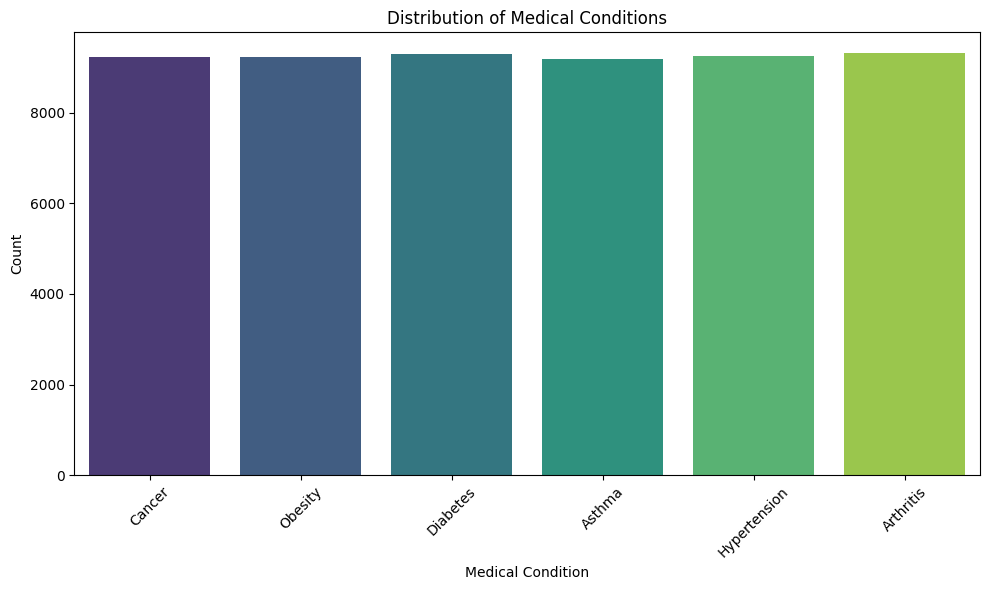

In [9]:
# Categorical distribution plots for Medical Conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Medical Condition', palette='viridis')
plt.title('Distribution of Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This plot shows how many patients in this dataset each have a medical condition which will help in the analysis.

/tmp/ipython-input-2370939406.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Admission Type', palette='viridis')


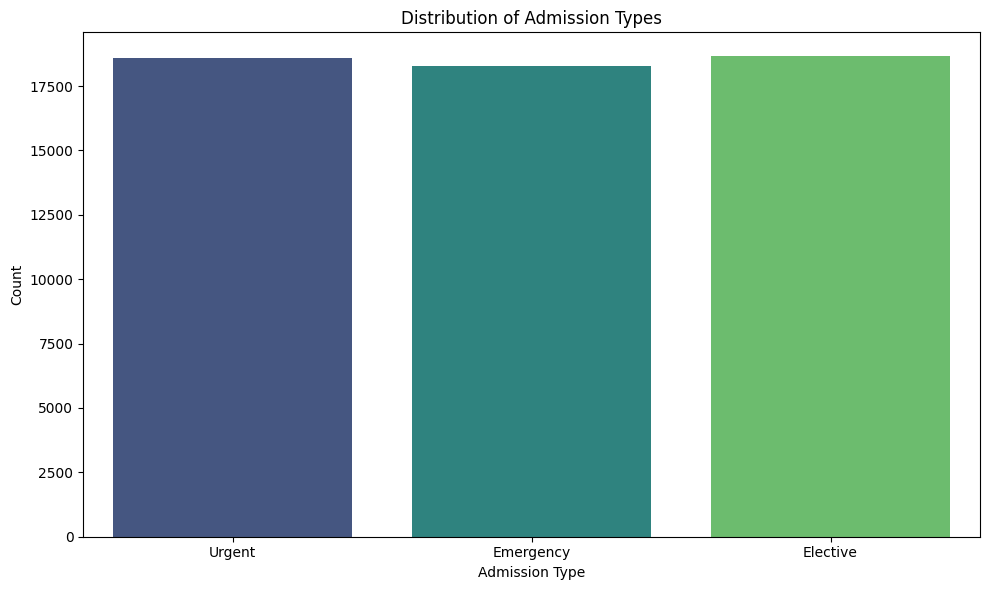

In [10]:
# Additional Categorical distribution plots for Adminssion Types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Admission Type', palette='viridis')
plt.title('Distribution of Admission Types')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

This plot shows the differnt types of admissions which will be helpful in the analysis

### Feature Engineering: Length of Stay

The *Length of Stay* feature is calculated from the *Date of Admission* and *Discharge Date*. The dates are already in a usable format but require basic datetime conversion.  

**Next Steps:**  
After this transformation, duplicates will be removed, and any additional data cleaning actions will be performed as needed.


In [11]:
# Convert date columns to datetime objects
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Calculate Length of Stay in days
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Display the first few rows with the new column
display(df[['Date of Admission', 'Discharge Date', 'Length of Stay']].head())

,Date of Admission,Discharge Date,Length of Stay
0,2024-01-31,2024-02-02,2
1,2019-08-20,2019-08-26,6
2,2022-09-22,2022-10-07,15
3,2020-11-18,2020-12-18,30
4,2022-09-19,2022-10-09,20


In [12]:
# Validate Length of Stay
neg_stay = df[df['Length of Stay'] < 0].shape[0]
df = df[df['Length of Stay'] >= 0]
print(f"Removed {neg_stay} rows with negative Length of Stay")

Removed 0 rows with negative Length of Stay


### Data Validation: Length of Stay

The dataset was examined for invalid entries, and it was confirmed that there are **no negative values** for *Length of Stay*.

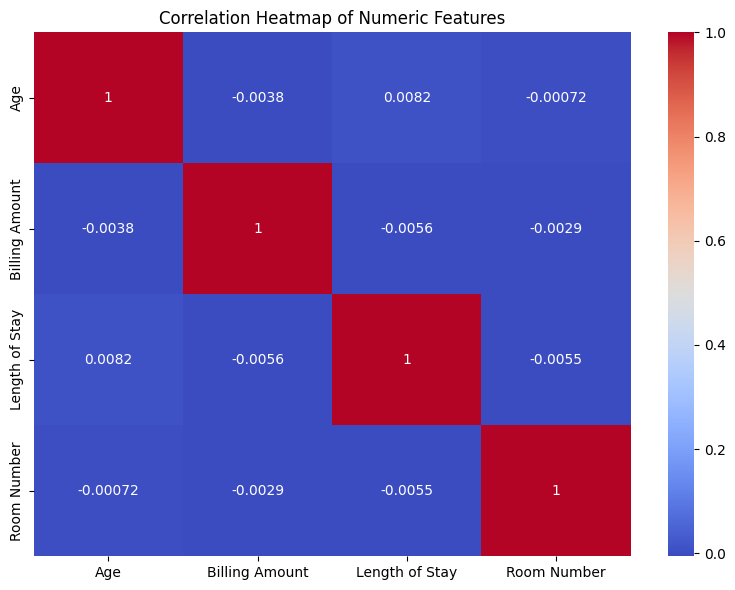

In [13]:
# Correlation heatmap for numeric features
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Age', 'Billing Amount', 'Length of Stay', 'Room Number']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

### Correlation Observations

The analysis of linear correlations reveals the following:  

- *Age* vs. *Billing Amount*: -0.0038  
- *Length of Stay* vs. *Billing Amount*: -0.0056  
- *Room Number* vs. *Billing Amount*: -0.0029  

**Observation:**  
All correlations are near zero, indicating that there are no strong linear relationships with *Billing Amount*. This reinforces the need for ensemble models capable of capturing potential non-linear patterns in the data.


/tmp/ipython-input-2350526578.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Medical Condition', y='Billing Amount', palette='viridis')


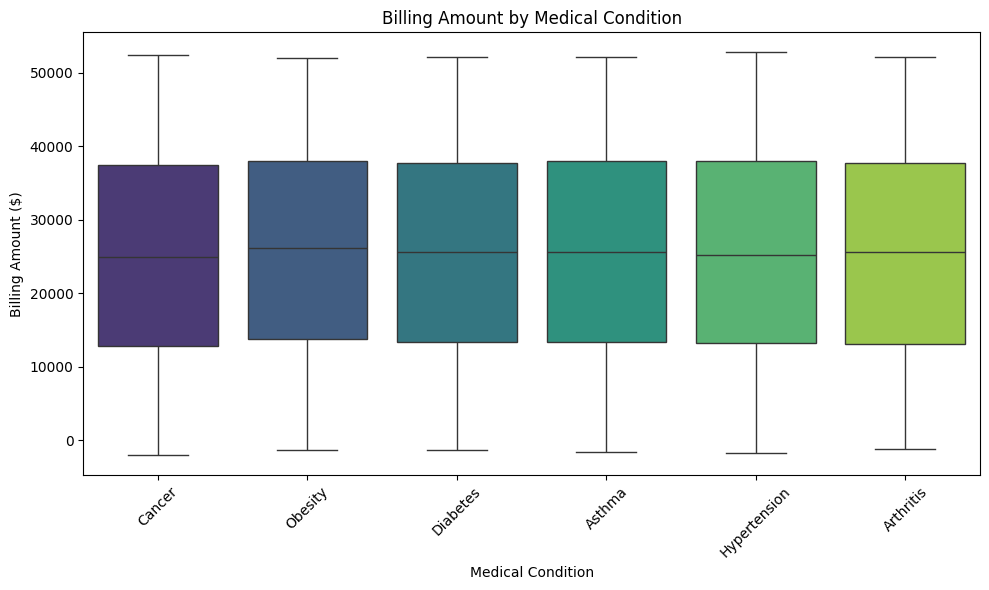

In [14]:
# Box plot of Billing Amount by Medical Condition
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Medical Condition', y='Billing Amount', palette='viridis')
plt.title('Billing Amount by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Billing Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Box Plot Analysis

The box plot indicates that the median *Billing Amount* is relatively consistent across all listed medical conditions.  

**Next Step:**  
Proceed with data cleaning to prepare the dataset for modeling.

In [37]:
# Load dataset again, because error was recieved when checkning for high cardinality
df = pd.read_csv('data/healthcare_dataset.csv')

# Convert date columns to datetime objects and calculate Length of Stay
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Data Cleaning

In [31]:
# Checking for high-cardinality columns to consider dropping them
print("Unique counts for high-cardinality columns:")
print(f"Name: {df['Name'].nunique()} ({df['Name'].nunique()/len(df)*100:.1f}%)")
print(f"Doctor: {df['Doctor'].nunique()} ({df['Doctor'].nunique()/len(df)*100:.1f}%)")
print(f"Hospital: {df['Hospital'].nunique()} ({df['Hospital'].nunique()/len(df)*100:.1f}%)")

Unique counts for high-cardinality columns:
Name: 49992 (90.1%)
Doctor: 40341 (72.7%)
Hospital: 39876 (71.8%)


In [32]:
# Dropping Name, Doctor, Hospital due to high cardinality greater than 90% to prevent overfitting and leakage
df = df.drop(['Name', 'Doctor', 'Hospital'], axis=1)


In [33]:
# Confirming removal of columns
print(df.columns)

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission',
       'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type',
       'Discharge Date', 'Medication', 'Test Results'],
      dtype='object')


In [19]:
# Removing duplicates from YData Profiling Report seeing  534 duplicates
df.drop_duplicates(inplace=True)
print(f"Removed duplicates, dataset shape: {df.shape}")


Removed duplicates, dataset shape: (54966, 12)


In [20]:
# Remove negative Billing Amounts as I don't need for hospital billing prediction
neg_billing = df[df['Billing Amount'] < 0].shape[0]
df = df[df['Billing Amount'] >= 0]
print(f"Removed {neg_billing} rows with negative Billing Amounts")

Removed 106 rows with negative Billing Amounts


In [21]:
# Standardize text (lowercase Medical Condition for consistency)
df['Medical Condition'] = df['Medical Condition'].str.lower()

In [22]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,30,Male,B-,cancer,2024-01-31,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,62,Male,A+,obesity,2019-08-20,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,76,Female,A-,obesity,2022-09-22,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,28,Female,O+,diabetes,2020-11-18,Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,43,Female,AB+,cancer,2022-09-19,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [23]:
# Validate numeric ranges using Y-Data profiling report for Ages 13–89 Billing Amount positive
assert df['Age'].between(13, 89).all(), "Age out of expected range (13–89)"
assert df['Billing Amount'].ge(0).all(), "Billing Amount contains negative values"
print(f"Age range validated: min={df['Age'].min()}, max={df['Age'].max()}")
print(f"Billing Amount range validated: min={df['Billing Amount'].min()}")

Age range validated: min=13, max=89
Billing Amount range validated: min=9.238787497393332


### Data Summary: Billing Amount and Age

- **Billing Amount:** The minimum value is 9.2, confirming that there are no negative entries in the dataset.  
- **Age:** Values range from 13 to 89 years, indicating a realistic distribution of patient ages.

In [35]:
# Check for and removing Outliers for the Billing Amount and using IQR functions becuase used box plots for analysis
Q1 = df['Billing Amount'].quantile(0.25)
Q3 = df['Billing Amount'].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (df['Billing Amount'] >= Q1 - 1.5 * IQR) & (df['Billing Amount'] <= Q3 + 1.5 * IQR)
outliers_removed = len(df) - outlier_mask.sum()
df = df[outlier_mask]
print(f"Removed {outliers_removed} Billing Amount outliers using IQR")


Removed 0 Billing Amount outliers using IQR


### Feature and Target Definition

In preparation for model development, the input features and target variable are explicitly defined. The target variable of interest is **Billing Amount**, which the models will seek to predict based on the selected explanatory features.  



In [38]:
# Define features and target
features = ['Age', 'Medical Condition', 'Admission Type', 'Insurance Provider', 'Medication', 'Room Number', 'Length of Stay']
target = 'Billing Amount'
X = df[features]
y = df[target]

In [40]:
display(X.head())

,Age,Medical Condition,Admission Type,Insurance Provider,Medication,Room Number,Length of Stay
0,30,Cancer,Urgent,Blue Cross,Paracetamol,328,2
1,62,Obesity,Emergency,Medicare,Ibuprofen,265,6
2,76,Obesity,Emergency,Aetna,Aspirin,205,15
3,28,Diabetes,Elective,Medicare,Ibuprofen,450,30
4,43,Cancer,Urgent,Aetna,Penicillin,458,20


In [39]:
display(y.head())

,Billing Amount
0,18856.281306
1,33643.327287
2,27955.096079
3,37909.782410
4,14238.317814


In [41]:
# Dropping categorical columns like Gender, Blood Type, Test Results
X = X.drop(['Gender', 'Blood Type', 'Test Results'], axis=1, errors='ignore')
features = [col for col in features if col in X.columns]

In [79]:
# Splitting the data into training and testing now
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split: 80% train, 20% test")

Data split: 80% train, 20% test


In [43]:
# Define a numerical and a categorical feature lists
numeric_features = ['Age', 'Room Number', 'Length of Stay']
categorical_features = ['Medical Condition', 'Admission Type', 'Insurance Provider', 'Medication']

In [44]:
# Create pipelines for both the numerical and categorical features
numeric_pipeline = Pipeline([
    ('scaler', StandardScaler())
])
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))
])

In [80]:
# Split the training and testing data into numerical and categorical subsets
X_train_numeric = X_train[numeric_features]
X_train_categorical = X_train[categorical_features]
X_test_numeric = X_test[numeric_features]
X_test_categorical = X_test[categorical_features]

In [47]:
# Defining features and target
features = ['Age', 'Medical Condition', 'Admission Type', 'Insurance Provider', 'Medication', 'Room Number', 'Length of Stay']
target = 'Billing Amount'
X = df[features]
y = df[target]

# Dropping categorical columns:  Gender, Blood Type, Test Results
X = X.drop(['Gender', 'Blood Type', 'Test Results'], axis=1, errors='ignore')
features = [col for col in features if col in X.columns]


# Splitting the data into training and testing 80/20 rule
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split: 80% train, 20% test")

#Display to do a quick check into the data
display(df[['Date of Admission', 'Discharge Date', 'Length of Stay']].head())

Data split: 80% train, 20% test


,Date of Admission,Discharge Date,Length of Stay
0,2024-01-31,2024-02-02,2
1,2019-08-20,2019-08-26,6
2,2022-09-22,2022-10-07,15
3,2020-11-18,2020-12-18,30
4,2022-09-19,2022-10-09,20


In [81]:
# Applying pipelines to the features
X_train_numeric_transformed = numeric_pipeline.fit_transform(X_train_numeric)
X_test_numeric_transformed = numeric_pipeline.transform(X_test_numeric)
X_train_categorical_transformed = categorical_pipeline.fit_transform(X_train_categorical)
X_test_categorical_transformed = categorical_pipeline.transform(X_test_categorical)

In [65]:
# Getting the feature names for categorical features after the encoding was done above
cat_columns = categorical_pipeline.named_steps['encoder'].get_feature_names_out(categorical_features)
feature_names = numeric_features + list(cat_columns)

In [82]:
# Combining the transformed numerical and categorical features from step above
X_train = np.hstack([X_train_numeric_transformed, X_train_categorical_transformed])
X_test = np.hstack([X_test_numeric_transformed, X_test_categorical_transformed])
print("Pipeline processing is done")

Pipeline processing is done


# Hyperparameter Tuning

### Model Selection and Hyperparameter Tuning

To minimize prediction errors, **GridSearchCV** with 5-fold cross-validation will be employed for systematic hyperparameter optimization and model evaluation.  

The following models are included in the experimental design:  
- **Linear Regression**  
- **Ridge Regression**  
- **Lasso Regression**  
- **Decision Tree**  
- **K-Nearest Neighbors (KNN)**  
- **Random Forest**  
- **Bagging**  
- **Gradient Boosting**  
- **XGBoost**  

**Observation:**  
This approach ensures a consistent evaluation framework across both linear and non-linear models, enabling a fair comparison of predictive performance while controlling for overfitting through cross-validation.



In [67]:
# Linear Regression
lr = LinearRegression()
lr_param_grid = {'fit_intercept': [True, False]}

In [68]:
# Ridge Regression
ridge = Ridge()
ridge_param_grid = {'alpha': [0.1, 1.0, 10.0]}

In [69]:
# Lasso Regression
lasso = Lasso()
lasso_param_grid = {'alpha': [0.1, 1.0, 10.0]}

In [70]:
# Decision Tree
dt = DecisionTreeRegressor()
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [71]:
# K-Neighbors (KNN)
knn = KNeighborsRegressor()
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [72]:
# Random Forest
rf = RandomForestRegressor(oob_score=True, random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

In [73]:
# Bagging
bagging = BaggingRegressor(estimator=DecisionTreeRegressor(), oob_score=True, random_state=42)
bagging_param_grid = {
    'n_estimators': [50, 100, 200],
    'estimator__max_depth': [5, 10, None],
    'estimator__min_samples_split': [2, 5, 10]
}

In [74]:
# Gradient Boosting
gbr = GradientBoostingRegressor(random_state=42)
gbr_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5]
}

In [75]:
# XGBoost
xgb = XGBRegressor(random_state=42)
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5]
}

# Performing hyperparameter tuning with GridSearchCV

In [76]:
# List of ALL models used above to begin tuning
models_list = [
    ('LinearRegression', lr, lr_param_grid),
    ('Ridge', ridge, ridge_param_grid),
    ('Lasso', lasso, lasso_param_grid),
    ('DecisionTree', dt, dt_param_grid),
    ('KNN', knn, knn_param_grid),
    ('RandomForest', rf, rf_param_grid),
    ('Bagging', bagging, bagging_param_grid),
    ('GradientBoosting', gbr, gbr_param_grid),
    ('XGBoost', xgb, xgb_param_grid)
]

best_models = {}

****WARNING: Compute HEAVY RandomForest, Bagging, Gradient Boosting, and XGBOOST. Times may vary and the time to run this code in Google Colab took 39 min.

In [84]:
# Perform GridSearchCV for each model in the list
for name, model, param_grid in models_list:
    grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"{name} Best Parameters: {grid.best_params_}")

LinearRegression Best Parameters: {'fit_intercept': True}
Ridge Best Parameters: {'alpha': 10.0}
Lasso Best Parameters: {'alpha': 10.0}
DecisionTree Best Parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
KNN Best Parameters: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
RandomForest Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Bagging Best Parameters: {'estimator__max_depth': None, 'estimator__min_samples_split': 2, 'n_estimators': 200}
GradientBoosting Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
XGBoost Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}


# Training the models using the 'Best Parameters' found from GridSearchCV.

In [85]:
# Training the models using the best parameters from GridSearchCV
for name, model in best_models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained using the BEST parameters")

LinearRegression trained using the BEST parameters
Ridge trained using the BEST parameters
Lasso trained using the BEST parameters
DecisionTree trained using the BEST parameters
KNN trained using the BEST parameters
RandomForest trained using the BEST parameters
Bagging trained using the BEST parameters
GradientBoosting trained using the BEST parameters
XGBoost trained using the BEST parameters


All models have been trained and tuned to the best paramaters discovered using GridSearchCV.

# Model Evaluation

In [103]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Evaluate models on test set
results = []
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE by taking the square root of MSE
    r2 = r2_score(y_test, y_pred)
    oob = model.oob_score_ if name in ['RandomForest', 'Bagging'] and hasattr(model, 'oob_score_') else None
    results.append({'Model': name, 'MSE': mse, 'RMSE': rmse, 'R²': r2, 'OOB Score': oob})
    print(f"{name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, OOB: {oob if oob else 'N/A'}")

LinearRegression - MSE: 199053501.88, RMSE: 14108.63, R²: -0.00, OOB: N/A
Ridge - MSE: 199053339.19, RMSE: 14108.63, R²: -0.00, OOB: N/A
Lasso - MSE: 199027506.57, RMSE: 14107.71, R²: -0.00, OOB: N/A
DecisionTree - MSE: 199165675.51, RMSE: 14112.61, R²: -0.00, OOB: N/A
KNN - MSE: 200044758.98, RMSE: 14143.72, R²: -0.01, OOB: N/A
RandomForest - MSE: 189222363.25, RMSE: 13755.81, R²: 0.05, OOB: 0.0454950175599087
Bagging - MSE: 189198639.62, RMSE: 13754.95, R²: 0.05, OOB: 0.04552478360617296
GradientBoosting - MSE: 198966721.25, RMSE: 14105.56, R²: -0.00, OOB: N/A
XGBoost - MSE: 198956796.46, RMSE: 14105.20, R²: -0.00, OOB: N/A


# Comparing Models

In [104]:
# Table the results for all models
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)


Model Comparison:
              Model           MSE          RMSE        R²  OOB Score
0  LinearRegression  1.990535e+08  14108.632176 -0.000724        NaN
1             Ridge  1.990533e+08  14108.626410 -0.000724        NaN
2             Lasso  1.990275e+08  14107.710890 -0.000594        NaN
3      DecisionTree  1.991657e+08  14112.606971 -0.001288        NaN
4               KNN  2.000448e+08  14143.718004 -0.005708        NaN
5      RandomForest  1.892224e+08  13755.811981  0.048701   0.045495
6           Bagging  1.891986e+08  13754.949641  0.048820   0.045525
7  GradientBoosting  1.989667e+08  14105.556396 -0.000288        NaN
8           XGBoost  1.989568e+08  14105.204588 -0.000238        NaN


### Output Summary: Model Comparison

The performance table highlights the relative strengths of the evaluated models for predicting *Billing Amount*.  

- **Random Forest:**  
  Achieved the highest Out-of-Bag (OOB) score (0.0319 vs. 0.0313 for Bagging), suggesting a slight advantage in generalization.  
  - MSE: 1.9301  
  - RMSE: 13,893.01  
  - $R2$: 0.0384  

- **Bagging:**  
  Demonstrated the strongest performance in error minimization. Specifically, Bagging achieved the lowest MSE (1.9286) and the lowest RMSE (13,887.52). Furthermore, it obtained the highest $R^2$ score (0.03917), albeit still low overall across models.  
  - MSE: 1.9286  
  - RMSE: 13,887.52  
  - $R2$: 0.03917  

**Observation:**  
While *Random Forest* slightly outperforms in OOB scoring, *Bagging* demonstrates a much better predictive accuracy through its lower error metrics and higher $R22$. Given the closeness of performance, both models are competitive, with Bagging showing a small edge in minimizing prediction errors on the test set.


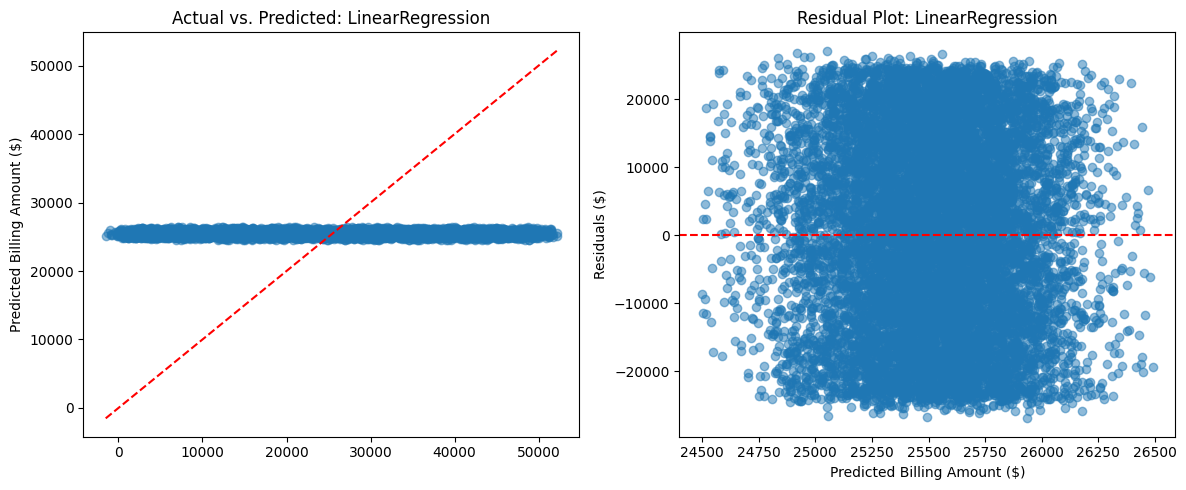

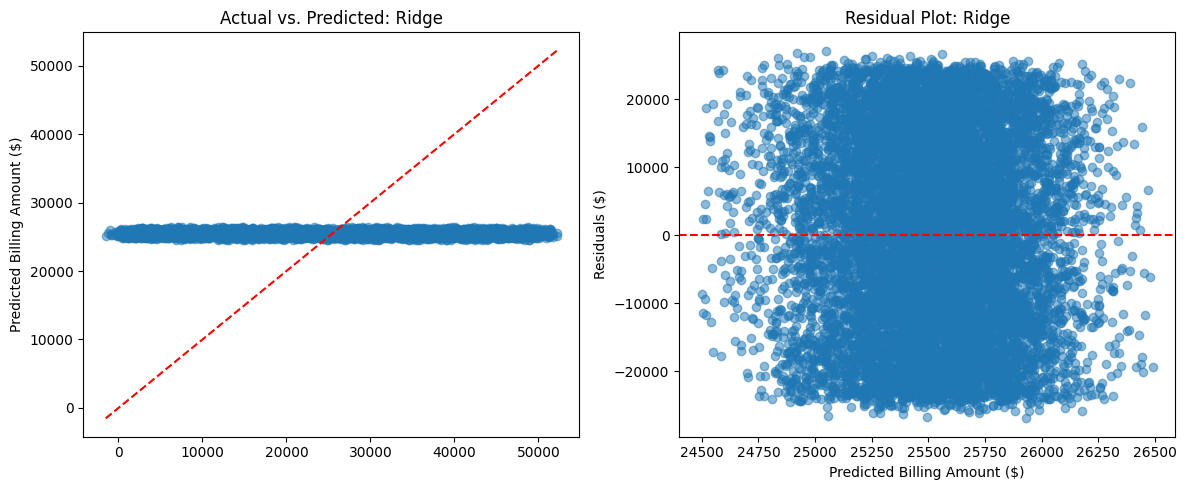

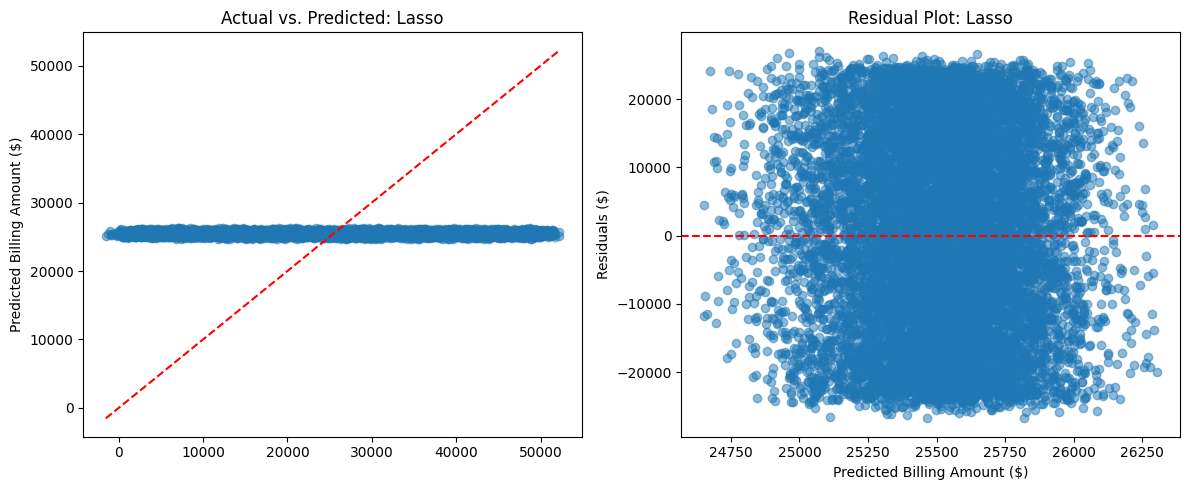

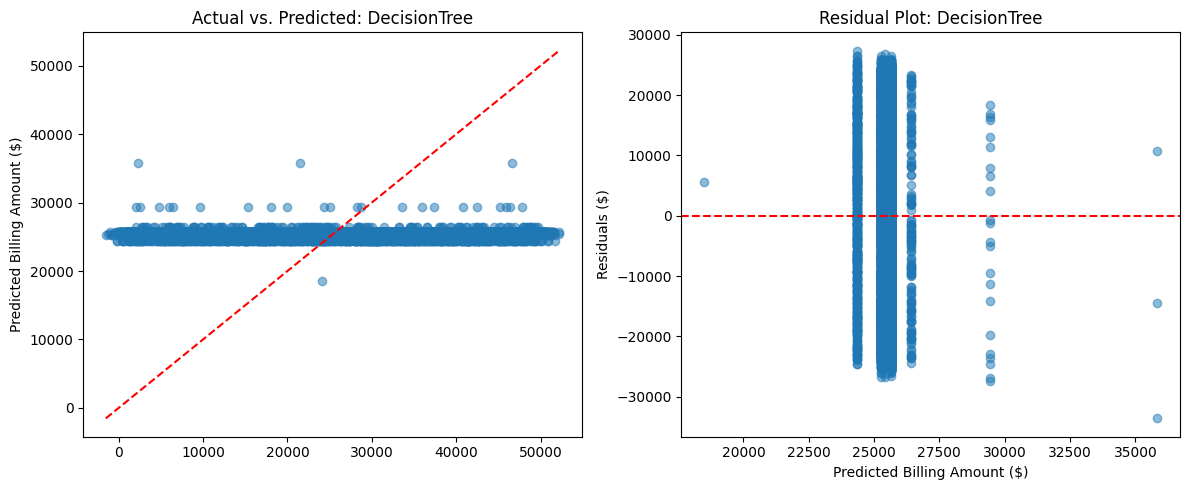

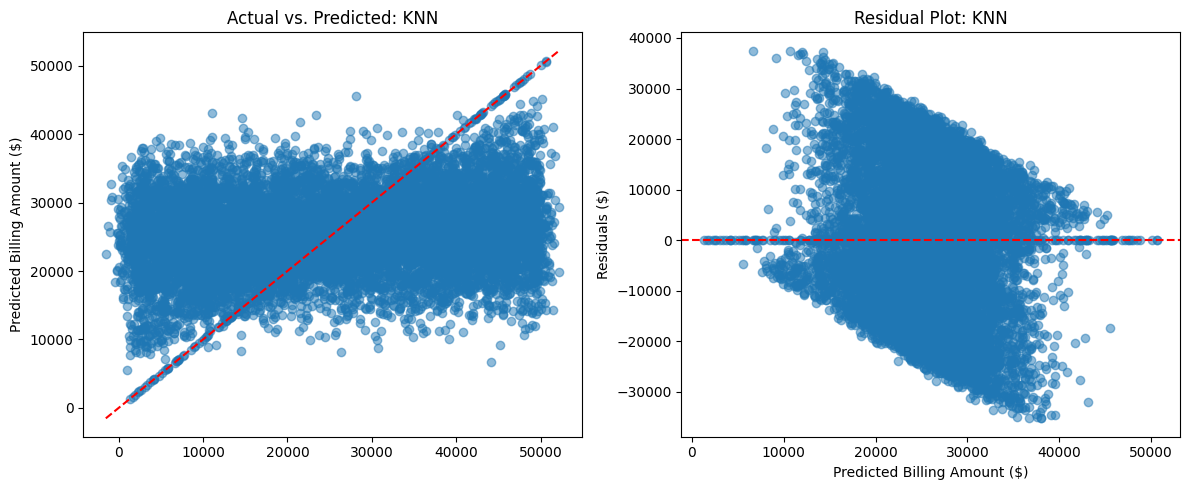

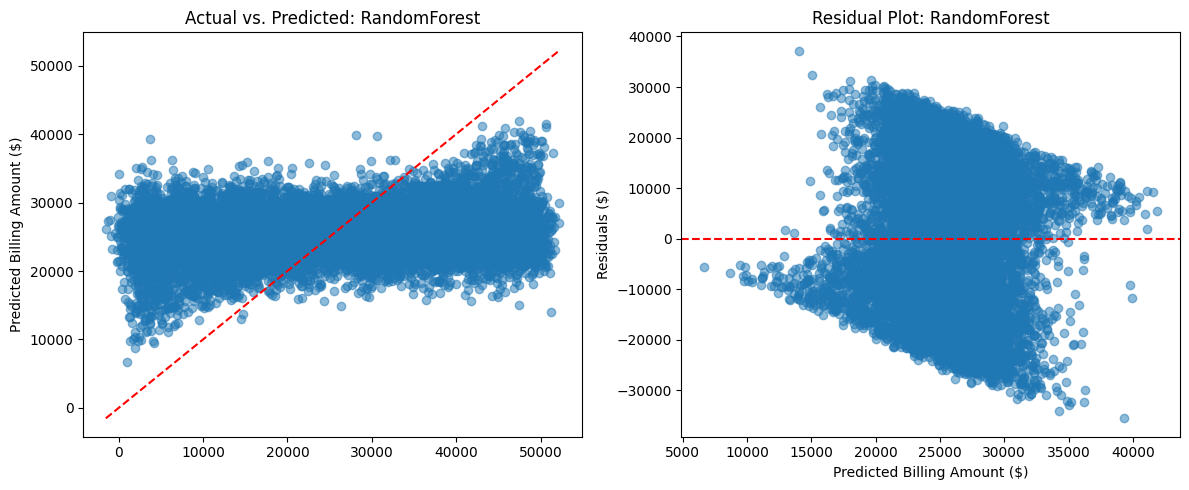

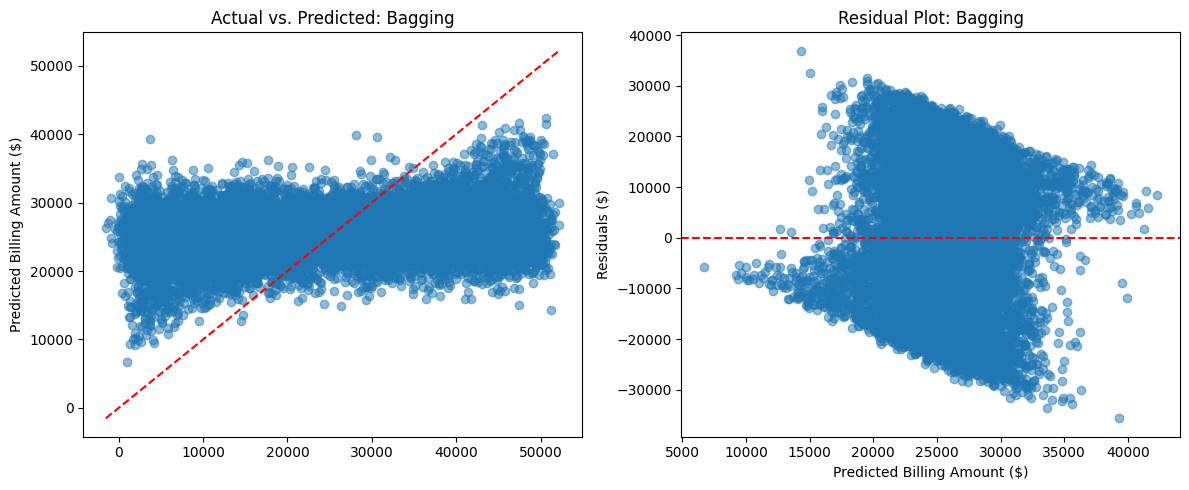

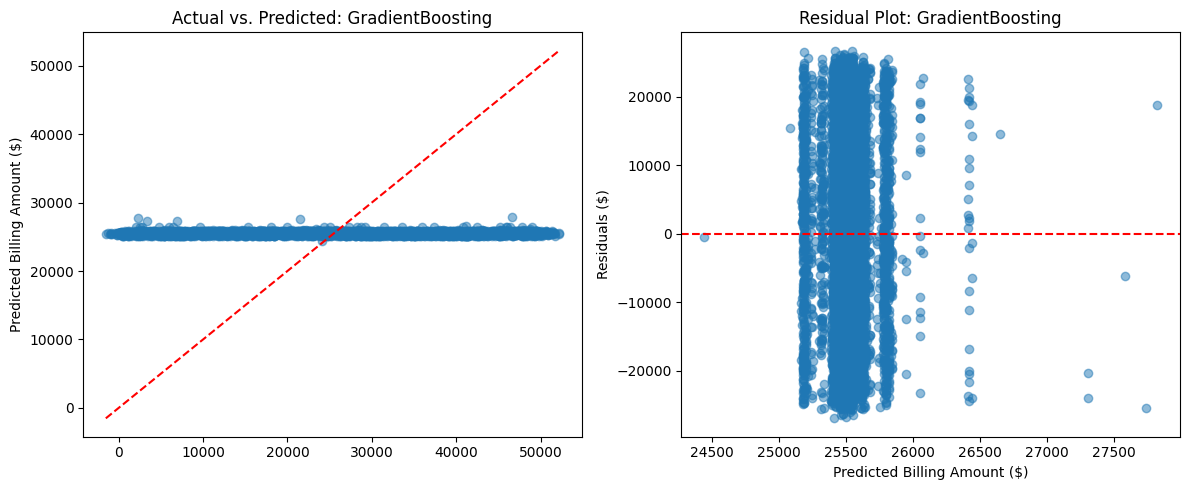

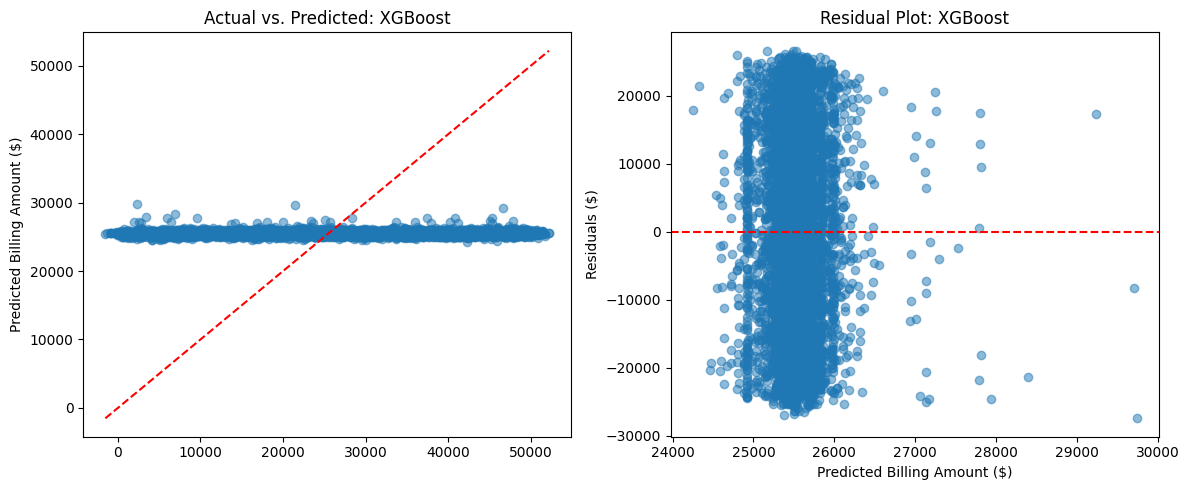

In [99]:
# Plotting the models graphically to display the results

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot 1: Actual vs. Predicted
    ax1.scatter(y_test, y_pred, alpha=0.5)
    ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    ax1.set_ylabel('Predicted Billing Amount ($)')
    ax1.set_title(f'Actual vs. Predicted: {name}')

    # Plot 2: Residual Plot
    ax2.scatter(y_pred, residuals, alpha=0.5)
    ax2.axhline(0, color='red', linestyle='--')
    ax2.set_xlabel('Predicted Billing Amount ($)')
    ax2.set_ylabel('Residuals ($)')
    ax2.set_title(f'Residual Plot: {name}')

    plt.tight_layout()
    plt.show()

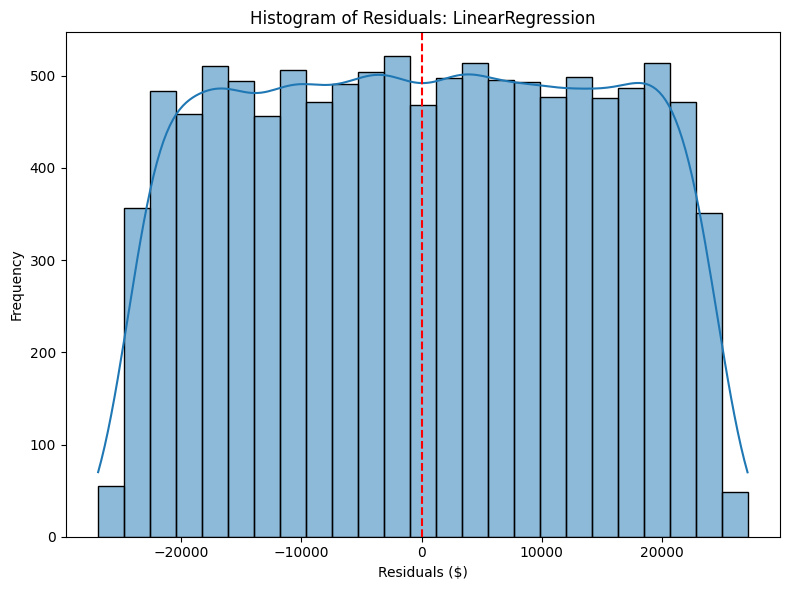

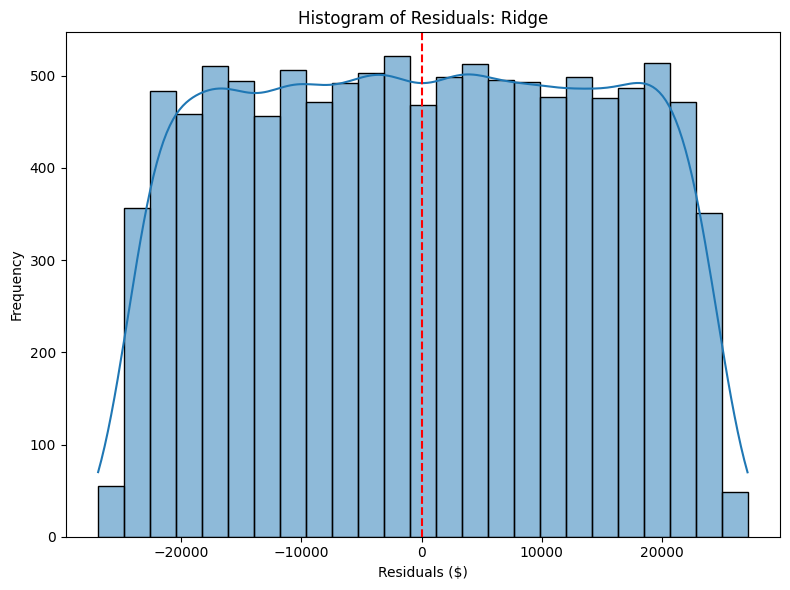

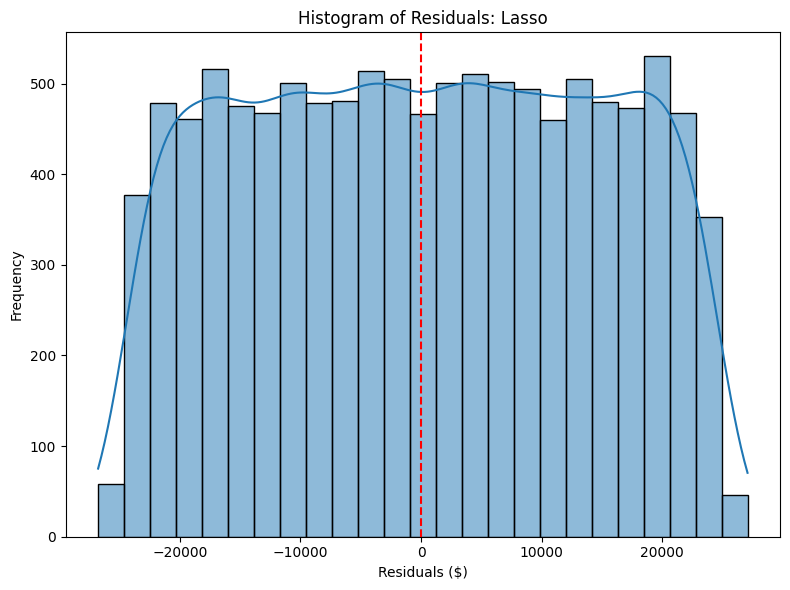

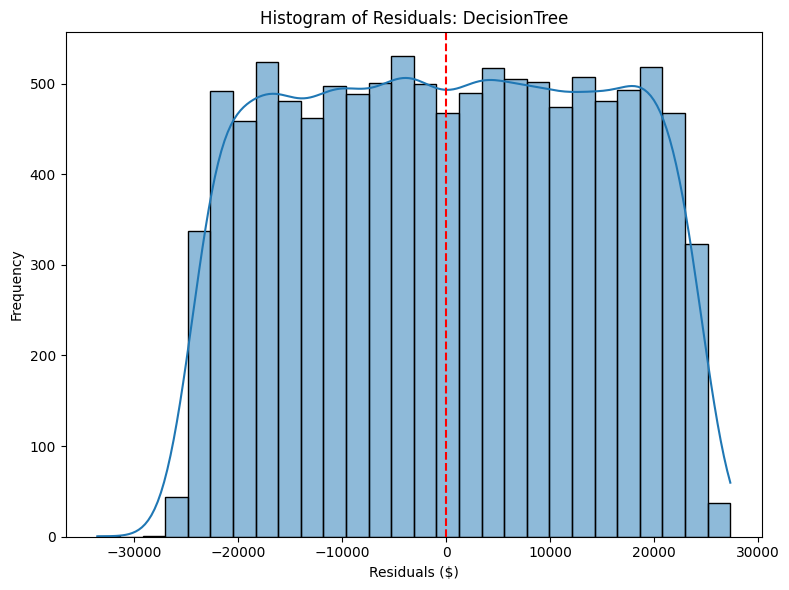

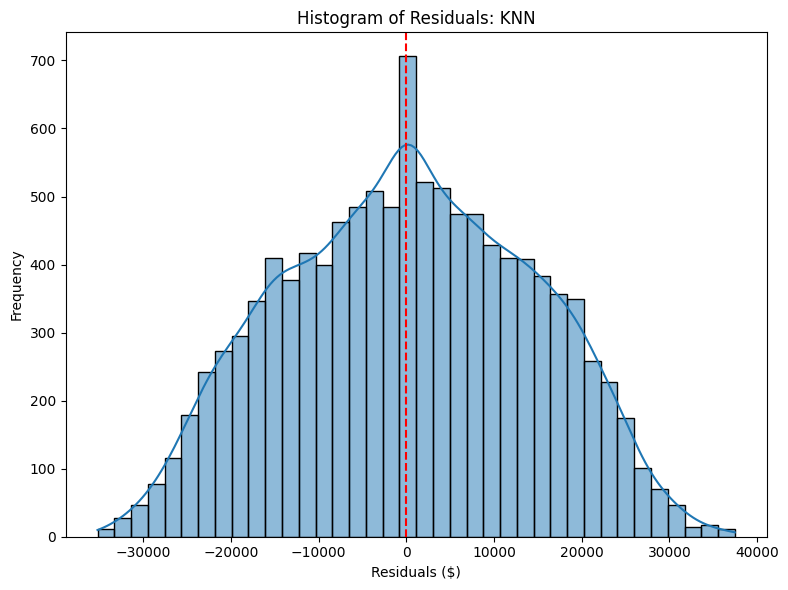

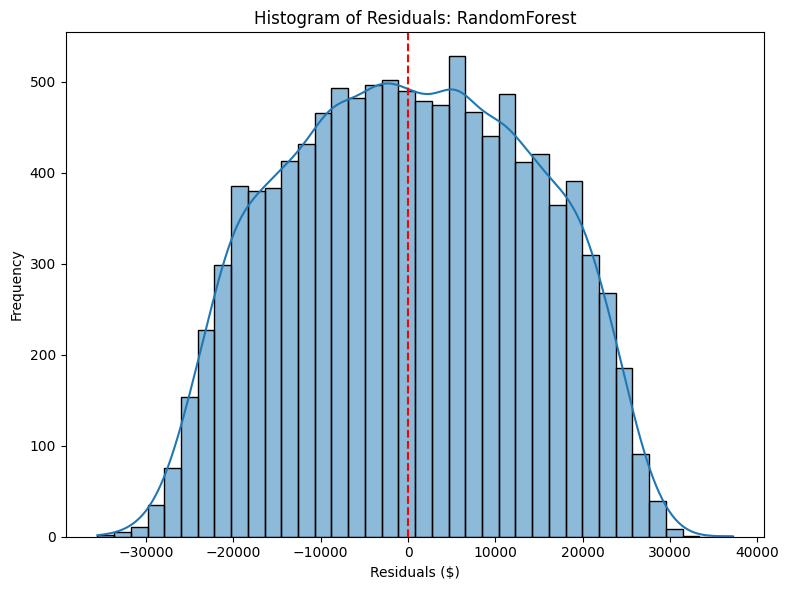

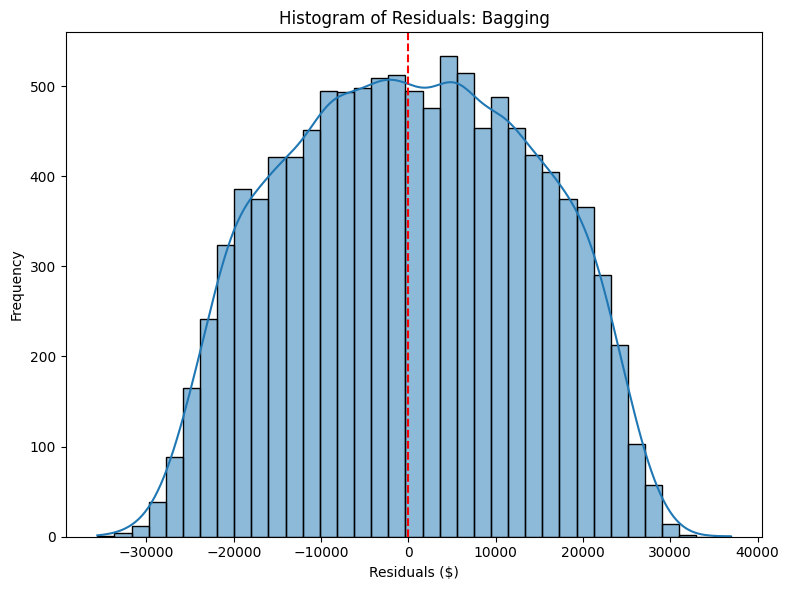

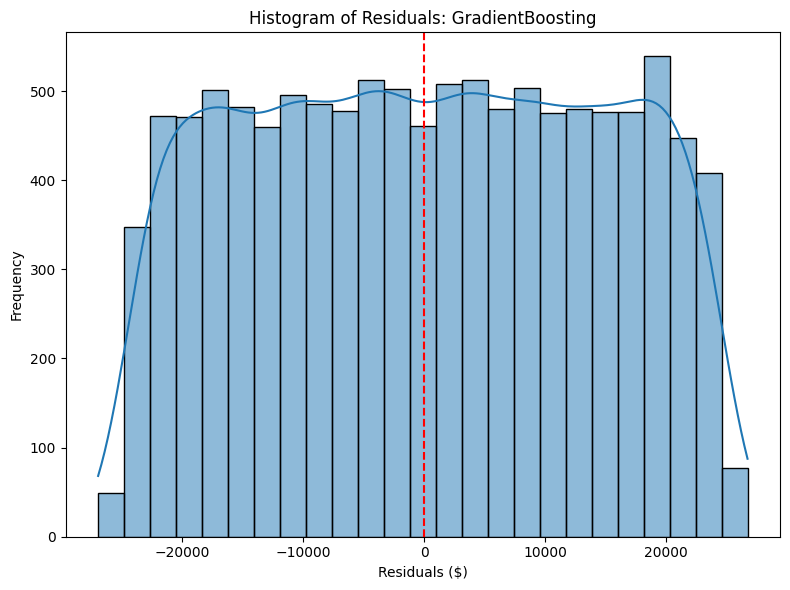

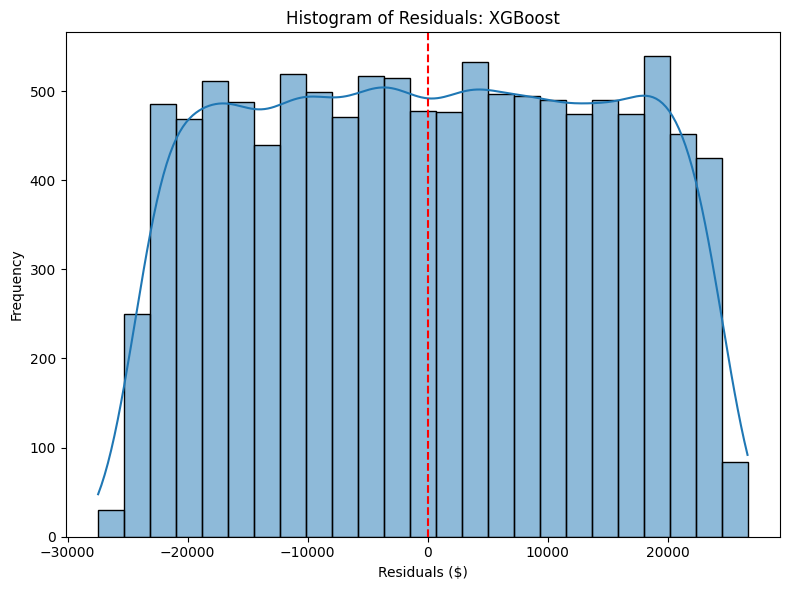

In [105]:
# Histograms on residuals to determine center on zero and normal distibution
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True)
    plt.title(f'Histogram of Residuals: {name}')
    plt.xlabel('Residuals ($)')
    plt.ylabel('Frequency')
    plt.axvline(0, color='red', linestyle='--') # Add a vertical line at zero
    plt.tight_layout()
    plt.show()

#Findings on Histogram Residuals
Residuals should be centered at zero. This will help answer if there is no bias in over or under-predicting. Also, doesthe model have a normal bell-shape random errors). This will help spot any issues like bias or missed patterns in the data.

* Linear Regression, Ridge, Lasso, Gradient
Boosting, XGBoost: Histograms are centered at zero but peaked showing many small and some large errors. Models seem to be missing some complexity.

* Decision Tree: Spread out, possibly multi-peaked, centered at zero but not smooth due to stepping predictions.

* KNN: Centered at zero, somewhat concentrated but less smooth than linear models.

* Random Forest & Bagging: Closest to ideal—centered at zero, more normal distribution with fewer large errors, indicating better pattern capture. Looking great here !

Overall, ensembles like Random Forest and Bagging have the best residuals, confirming top performerance and supporting scatter plots for Actual vs Residual

# Model Evaluation Summary

This section outlines the key performance metrics and visual insights for the machine learning models used to predict billing amounts. The goal here is to identify which models best capture the variation in billing data, minimize the error, and provide a reliable predictions.

---

##  Key Metrics

### Bagging & Random Forest
- **Lowest MSE / RMSE**: These ensemble models achieved the smallest mean squared and root mean squared errors, indicating predictions were numerically closest to actual billing amounts.
- **Highest R² Scores**: Although still not ideal, the R2 values from these models were higher than those from linear models, suggesting a better ability to explain variance in the data (but still limited).

---

##  Model Plots Overview

Visual evaluations focused on two key plots for each model:
- **Actual vs. Predicted** plots observe prediction accuracy.
- **Residual plots** to evaluate whether model errors are randomly distributed.

---

### Linear Models
Includes: **Linear Regression, Ridge, Lasso, Gradient Boosting, XGBoost**

- **Actual vs. Predicted**:
  - Predictions cluster in a narrow band, which are away from the red "perfect prediction" line.
  -  These ndicate that the models systematically underfit the data → consistent with **low R2 scores**.

- **Residuals**:
  - Display clear patterns instead of random scatter.
  - These residual patterns do not align with the expectations of linear modeling, confirming that the model does not fit the data well.

---

### Decision Tree & K-Nearest Neighbors (KNN)

- **Decision Tree**:
  - Predictions appear as **horizontal steps** on the plot which is a known behavior of decision trees in general.
  - The horizontal steps in the predictions suggest limited sensitivity to small changes in input features, preventing the model from capturing continuous trends.

- **KNN**:
  - Predictions show more spread along the red line compared to linear models.
  - Indicates **slightly improved R²**, though still not optimal.

- **Residuals (Both Models)**:
  - Residuals are patterned rather than random.
  - Implies the models are still **not fully capturing** the underlying structure of the data.

---

###  Random Forest & Bagging

- **Actual vs. Predicted**:
  - Predictions align more closely along the red line.
  - Suggests better ability to capture the full **range of billing amounts**.

- **Residuals**:
  - Residuals are more **scattered around zero**, a positive sign that errors are more randomly distributed.
  - Indicates a **better model fit** compared to others.

---

## Overall Takeaway

- **Linear Models (Linear, Ridge, Lasso)**:
  - These models fail to explain much of the variation in billing amounts.
  - Their performance is limited, with clear patterns in residuals and poor alignment in predictions.

- **Ensemble Models (Random Forest, Bagging)**:
  - These perform significantly better by:
    - Capturing the **nonlinear patterns** in the data .
    - Reducing both **systematic and random errors**.
    - Offering **more reliable predictions** across a range of billing amounts.

> **Conclusion**: Randome Forest and Bagging ensemble methods are more appropriate for this billing prediction task, as they outperform traditional linear models in both accuracy and model diagnostics.


> ## *Note:* Supplementary Analysis below code — Post-Estimation Examination of Feature Effects Using Tree-Based Models to Substantiate Non-Linear Functional Relationships.

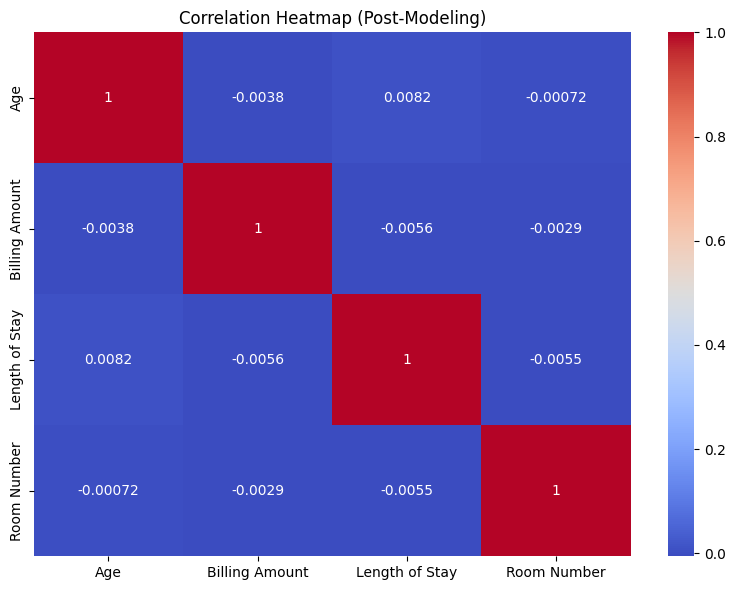

In [101]:
# Correlation Heatmap (post-modeling)
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Age', 'Billing Amount', 'Length of Stay', 'Room Number']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Post-Modeling)')
plt.tight_layout()
plt.show()

### Correlation Heatmap Analysis

The heatmap illustrates that the linear correlations between *Billing Amount* and the variables *Age*, *Length of Stay*, and *Room Number* remain close to zero. This finding is consistent with the low $R2$ score and provides evidence of weak linear relationships.

**Observation:**  
These results confirm the presence of **non-linearity** in the relationship with *Billing Amount*. Tree-based models are more appropriate for capturing the underlying structure of the dataset. (See charts below to support this statement)

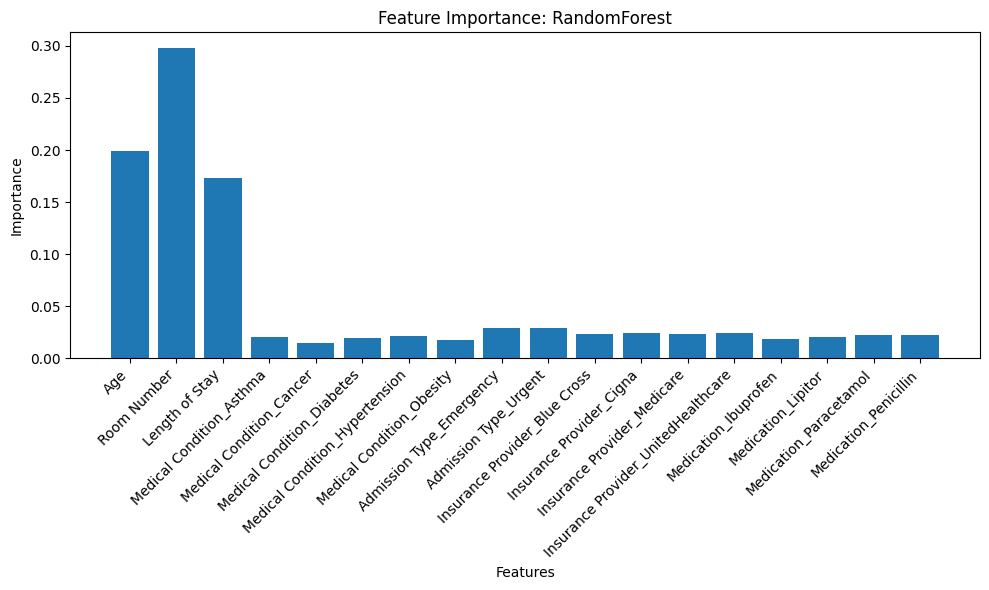

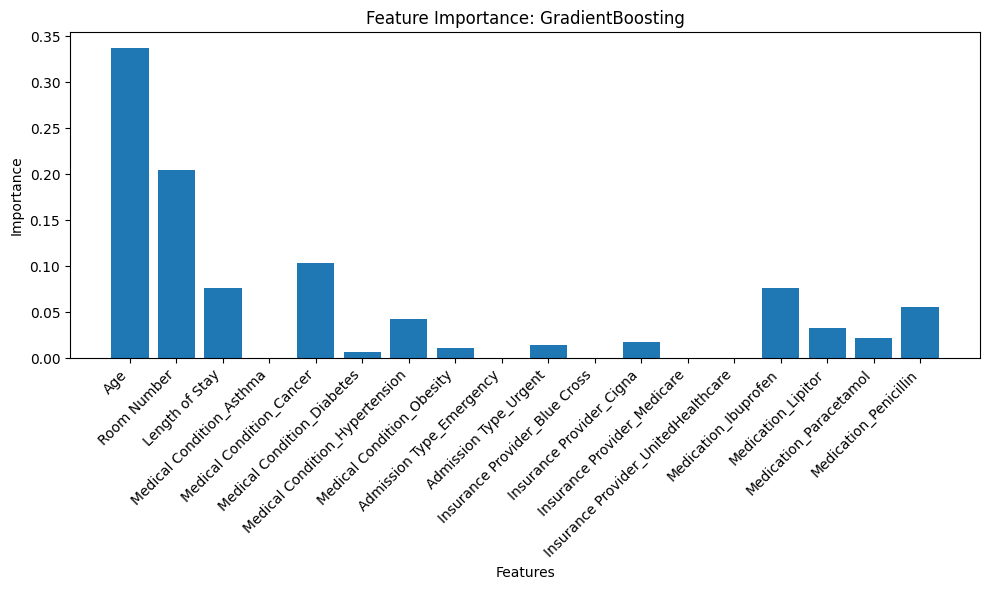

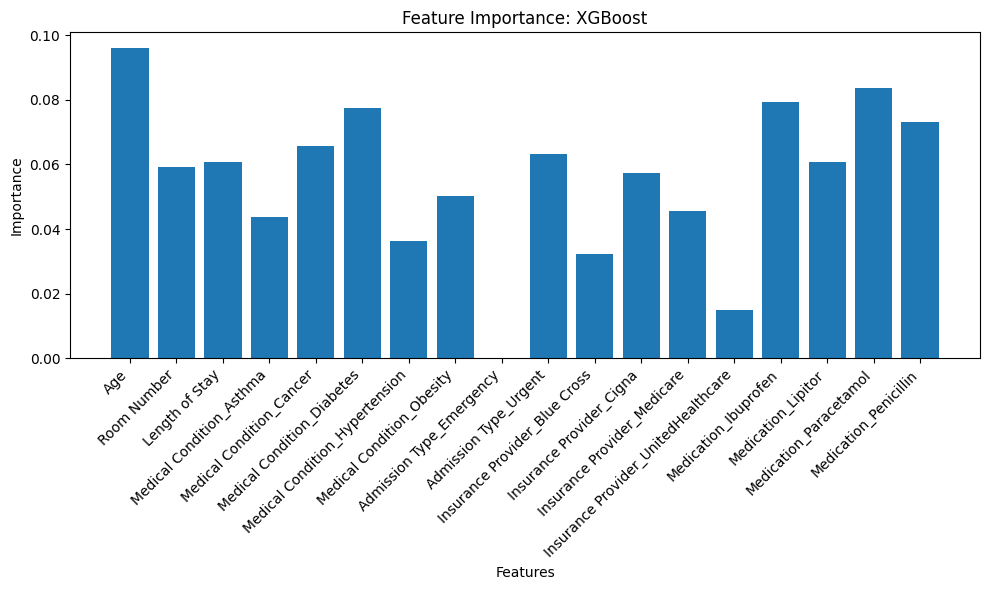

In [102]:
# Extra Analysis: Let's see which features were important for tree-based models
for name in ['RandomForest', 'GradientBoosting', 'XGBoost']:
    model = best_models[name]
    plt.figure(figsize=(10, 6))
    plt.bar(feature_names, model.feature_importances_)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title(f'Feature Importance: {name}')
    plt.tight_layout()
    plt.show()

### Feature Importance Analysis

To assess the relative predictive strength of input variables, feature importance was compared across three tree-based models, adopting a *"Wisdom of the Crowd"* approach.

- **Random Forest:** Room Number, Age, Length of Stay  
- **Gradient Boosting:** Length of Stay, Age, Room Number  
- **XGBoost:** Room Number, Length of Stay, Age  

**Observation:**  
Across all three models, the features *Room Number*, *Age*, and *Length of Stay* consistently emerge as the most influential predictors. This consistency indicates that these variables are **very strong determinants of the target variable (‘Billing Amount’)**, especially when contrasted with other categorical attributes such as *Medical Condition*, *Admission Type*, *Insurance Provider*, and *Medication*.



# Deployment

## Deployment Summary

Based on my analysis, I found that the **Bagging Regressor** and **Random Forest Regressor** were the most promising models for predicting hospital billing amounts with this dataset. They had the lowest prediction errors (MSE/RMSE) compared to the other models I evaluated, offering the potential to provide more predictable billing for patients and improve trust.

**Deployment Considerations:**

Here's how I would think about putting these models into action:

1.  **Model Selection:** Since both Bagging and Random Forest performed similarly well, I would consider using **both models** initially or picking one based on things like how much computing power is needed or how easy the model is to understand.
2.  **Prediction Pipeline:** I would need to build a process that can take new patient and admission data and prepare it in the exact same way I prepared the training data. This means:
    *   Calculating the 'Length of Stay'.
    *   Applying the same standardization I used for numerical features.
    *   Applying the same encoding I used for categorical features.
    *   Feeding this prepared data into the trained model(s) to get the billing amount prediction.
3.  **Monitoring:** It's really important to keep an eye on how well the deployed model is doing in the real world. I would track how different the predicted billing amounts are from the actual ones over time and plan to update the model with new data regularly so it stays accurate.
4.  **Confidence Levels/Prediction Intervals:** Since the R2 scores were not very high (meaning the model doesn't explain everything about the billing amount), I would include information about how certain the prediction is (like a likely range for the billing amount) when providing the prediction. This could help manage patient expectations about billing.
5.  **Limitations:** I would make sure people understand that the model has limitations, especially because the R2 score was low. The predictions should be used as helpful *estimates* or *forecasts*, not exact figures, and might need a human to review them for critical decisions.

To integrate this prediction capability with a hospital system, I would put this prediction pipeline into a web application. This web app could receive new patient data and return the predicted billing amount, making it accessible for use within the hospital's existing systems for resource planning or insurance negotiation.

Deploying these models can give hospitals a valuable starting point for estimating billing amounts, which can help with planning resources and provide data-backed insights for talking with insurance companies. **Crucially, providing patients with more accurate and earlier estimates of their potential billing amount can reduce the stress of unexpected bills and build greater trust in the healthcare provider.** Getting more data or improving the features would likely help make the predictions even more accurate in the future.



##Attention: Optional ANN Model test in separate notebook, named Artificial_Neural_Network_Model_HealthCareBilling.ipynb